In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import os

path= ' /content/drive/My Drive/school work/pose_test'


# 'path to yolo config file' 
# download https://github.com/arunponnusa|my/object-detection-opencv/blob/master/yolov3.cfg
CONFIG='/content/drive/My Drive/school work/pose_test/pose.cfg'

# 'path to text file containing class names'
# download https://github.com/arunponnusamy/object-detection-opencv/blob/master/yolov3.txt
CLASSES='/content/drive/My Drive/school work/pose_test/names.txt'

# 'path to yolo pre-trained weights' 
# wget https://pjreddie.com/media/files/yolov3.weights
WEIGHTS='/content/drive/My Drive/school work/pose_test/Latest_all_weights.weights'

VIDEO='/content/drive/My Drive/school work/pose_test/pose.mp4'

In [0]:
print(os.path.exists(CLASSES))
print(os.path.exists(CONFIG))
print(os.path.exists(WEIGHTS))
print(os.path.exists(VIDEO))

True
True
True
True


In [0]:
# read class names from text file

classes = None
with open(CLASSES, 'r') as f:
     classes = [line.strip() for line in f.readlines()]
        
scale = 0.00392
conf_threshold = 0.1
nms_threshold = 0.4

# generate different colors for different classes 
COLORS = np.random.uniform(0, 255, size=(len(classes), 3))

In [0]:
# function to get the output layer names 
# in the architecture
def get_output_layers(net): 
    layer_names = net.getLayerNames()
    output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
    return output_layers

# function to draw bounding box on the detected object with class name
def draw_bounding_box(img, class_id, confidence, x, y, x_plus_w, y_plus_h):
    label = str(classes[class_id])
    color = COLORS[class_id]
    cv2.rectangle(img, (x,y), (x_plus_w,y_plus_h), color, 2)
    cv2.putText(img, label, (x-10,y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

In [0]:
def draw_midpoint(image, coordinates,class_id):
  label=str(classes[class_id])
  colo=COLORS[class_id]
  cv2.circle(image, coordinates,15,(255,0,0),-1)
  x,y=coordinates
  cv2.putText(img, label, (x-10,y-10),cv2.FONT_HERSHEY_SIMPLEX,0.5,color,2)
  return image

In [0]:
# def drawing_skeleton(img0, img, lines):
def drawing_skeleton( img, lines):
    line1=[]
    line2=[]
    line3=[]
    line4=[]
    all_lines=[]
    
    for joint in ['Head','Torso','Hip']:
        if joint in lines['line1'].keys():
            cv2.circle(img, lines['line1'][joint][0], 8, (255,0,0), -1)
            line1.append(np.array(lines['line1'][joint][0]))
    all_lines.append(np.asarray(line1).reshape((-1,1,2)))
    
    for joint in ['Hip','RightKnee','RightAnkle']:
        if joint in lines['line2'].keys():
            cv2.circle(img, lines['line2'][joint][0], 8, (255,0,0), -1)
            line2.append(np.array(lines['line2'][joint][0]))
    all_lines.append(np.asarray(line2).reshape((-1,1,2)))
    
    for joint in ['Hip','LeftKnee','LeftAnkle']:
        if joint in lines['line3'].keys():
            cv2.circle(img, lines['line3'][joint][0], 8, (255,0,0), -1)
            line3.append(np.array(lines['line3'][joint][0]))
    all_lines.append(np.asarray(line3).reshape((-1,1,2)))
    
    for joint in ['LeftWrist','LeftElbow','LeftShoulder','RightShoulder','RightElbow','RightWrist']:
        if joint in lines['line4'].keys():
            
            if joint=='RightShoulder':
                if 'LeftShoulder' not in lines['line4'].keys():
                    if 'Head' in lines['line1'].keys() and 'Torso' in lines['line1'].keys():
                        neck_x = round( ( lines['line1']['Torso'][0][0] + lines['line1']['Head'][0][0] )/2 )
                        neck_y = round( ( lines['line1']['Torso'][0][1] + lines['line1']['Head'][0][1] )/2 )
                        line4.append(np.array((neck_x,neck_y)))
                    else:
                        if 'Head' in lines['line1'].keys() and 'Hip' in lines['line1'].keys():
                            neck_x = round( ( lines['line1']['Hip'][0][0] + lines['line1']['Head'][0][0] )/2 )
                            neck_y = round( ( lines['line1']['Hip'][0][1] + lines['line1']['Head'][0][1] )/2 )
                            line4.append(np.array((neck_x,neck_y)))
            
            cv2.circle(img, lines['line4'][joint][0], 8, (255,0,0), -1)
            line4.append(np.array(lines['line4'][joint][0]))
            
            if joint=='LeftShoulder':
                if 'RightShoulder' not in lines['line4'].keys():
                    if 'Head' in lines['line1'].keys() and 'Torso' in lines['line1'].keys():
                        neck_x = round( ( lines['line1']['Torso'][0][0] + lines['line1']['Head'][0][0] )/2 )
                        neck_y = round( ( lines['line1']['Torso'][0][1] + lines['line1']['Head'][0][1] )/2 )
                        line4.append(np.array((neck_x,neck_y)))
                    else:
                        if 'Head' in lines['line1'].keys() and 'Hip' in lines['line1'].keys():
                            neck_x = round( ( lines['line1']['Hip'][0][0] + lines['line1']['Head'][0][0] )/2 )
                            neck_y = round( ( lines['line1']['Hip'][0][1] + lines['line1']['Head'][0][1] )/2 )
                            line4.append(np.array((neck_x,neck_y)))
    if len(line4)>3:
        all_lines.append(np.asarray(line4).reshape((-1,1,2)))
    
    image = cv2.polylines(img,all_lines,False,(0,255,255),5,cv2.LINE_AA)

    return image

In [0]:
# def processImage(image, image1, index):
def processImage(image, index):

    flags={
        'Head' : False,
        'Torso' : False,
        'Hip' : False,
        'RightKnee' : False,
        'RightAnkle' : False,
        'LeftKnee' : False,
        'LeftAnkle' : False,
        'RightWrist' : False,
        'RightElbow' : False,
        'RightShoulder' : False,
        'LeftShoulder' : False,
        'LeftElbow' : False,
        'LeftWrist' : False
    }
    Width = image.shape[1]
    Height = image.shape[0]

    # read pre-trained model and config file
    net = cv2.dnn.readNet(WEIGHTS, CONFIG)

    # create input blob 
    blob = cv2.dnn.blobFromImage(image, scale, (416,416), (0,0,0), True, crop=False)
    # set input blob for the network
    net.setInput(blob)

    # run inference through the network
    # and gather predictions from output layers
    outs = net.forward(get_output_layers(net))

    # initialization
    class_ids = []
    confidences = []
    boxes = []
    centroids=[]
    lines={'line1':{},
            'line2':{},
            'line3':{},
            'line4':{}}
    # for each detetion from each output layer 
    # get the confidence, class id, bounding box params
    # and ignore weak detections (confidence < 0.5)
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:
                center_x = int(detection[0] * Width)
                center_y = int(detection[1] * Height)
                w = int(detection[2] * Width)
                h = int(detection[3] * Height)
                x = center_x - w / 2
                y = center_y - h / 2
                centroids.append((center_x,center_y))
                class_ids.append(class_id)
                confidences.append(float(confidence))
                boxes.append([x, y, w, h])
            
    # apply non-max suppression
    indices = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold, nms_threshold)
    
    # Dictionary to store the coordinates of all the points to be joined for the 4 different lines. 
    # dictionary structure:
#     lines={'line1':{'head' : [ (centroid) , [bounding_box] ],
#                     'torso' : [ (centroid) , [bounding_box] ],
#                     'hip' : [ (centroid) , [bounding_box] ]},
#           'line2':{'hip' : [ (centroid) , [bounding_box] ],
#                   'LeftKnee' : [ (centroid) , [bounding_box] ],
#                   'LeftAnkle' : [ (centroid) , [bounding_box] ]},
#           'line3':{'hip' : [ (centroid) , [bounding_box] ],
#                   'RightKnee' : [ (centroid) , [bounding_box] ],
#                   'RightAnkle' : [ (centroid) , [bounding_box] ]},
#           'line4':{'LeftWrist' : [ (centroid) , [bounding_box] ],
#                    'LeftElbow' : [ (centroid) , [bounding_box] ],
#                    'LeftShoulder' : [ (centroid) , [bounding_box] ],
#                    'RightShoulder' : [ (centroid) , [bounding_box] ],
#                    'RightElbow' : [ (centroid) , [bounding_box] ],
#                    'RightWrist' : [ (centroid) , [bounding_box] ]}}
    
    # go through the detections remaining
    # after nms and draw bounding box
    for i in indices:
        i = i[0]
        box = boxes[i]
        x = box[0]
        y = box[1]
        w = box[2]
        h = box[3]
        label = str(classes[class_ids[i]])
        
        print('x: ',x,'\ny: ',y,'\nw: ',w,'\nh:',h,'\nid:',label)
        if label=='Hip':
            flags['Hip'] = True
            lines['line1']['Hip']=[ centroids[i] , [round(x), round(y), round(x+w), round(y+h)]]
            lines['line2']['Hip']=[ centroids[i] , [round(x), round(y), round(x+w), round(y+h)]]
            lines['line3']['Hip']=[ centroids[i] , [round(x), round(y), round(x+w), round(y+h)]]
            cv2.circle(image, centroids[i], 8, (255,0,0), -1 )
        elif label in ['Head','Torso']:
            flags[label]=True
            lines['line1'][label]=[ centroids[i] , [round(x), round(y), round(x+w), round(y+h)]]
            cv2.circle(image, centroids[i], 8, (255,0,0), -1 )
        elif label in ['RightKnee','RightAnkle']:
            flags[label]=True
            lines['line2'][label]=[ centroids[i] , [round(x), round(y), round(x+w), round(y+h)]]
            cv2.circle(image, centroids[i], 8, (255,0,0), -1 )
        elif label in ['LeftKnee','LeftAnkle']:
            flags[label]=True
            lines['line3'][label]=[ centroids[i] , [round(x), round(y), round(x+w), round(y+h)]]
            cv2.circle(image, centroids[i], 8, (255,0,0), -1 )
        elif label in ['RightWrist','RightElbow','RightShoulder','LeftShoulder','LeftElbow','LeftWrist']:
            flags[label]=True
            lines['line4'][label]=[ centroids[i] , [round(x), round(y), round(x+w), round(y+h)]]
            cv2.circle(image, centroids[i], 8, (255,0,0), -1 )
    
    
    # keep the below line only if you want the joints video. If you want skeletal video, comment out the below line.
    # return image


    #Keep below code if you want the pose video. Make sure the joints video code is commented out
    
    skeletal_img = drawing_skeleton(image, lines)
    return skeletal_img


In [0]:
FrameArray = []

cap = cv2.VideoCapture(VIDEO)

index = 0
while(cap.isOpened()):
  try:
    ret, frame = cap.read()
    image=processImage(frame,index)
    index = index +1
    FrameArray.append(image)
  except:
    break
  
out = cv2.VideoWriter('/content/drive/My Drive/school work/pose_test/output_videos/pose_video.avi',cv2.VideoWriter_fourcc(*'DIVX'), 25, (1280,720)) 
# out = cv2.VideoWriter('/content/drive/My Drive/school work/pose_test/joints_video.avi',cv2.VideoWriter_fourcc(*'DIVX'), 25, (1280,720)) 
for i in range(len(FrameArray)):
    # writing to a image array
    out.write(FrameArray[i])
out.release() 


Streaming output truncated to the last 5000 lines.
y:  562.0 
w:  113 
h: 78 
id: RightAnkle
x:  833.5 
y:  570.0 
w:  143 
h: 68 
id: LeftAnkle
x:  703.0 
y:  374.5 
w:  90 
h: 77 
id: RightElbow
x:  709.5 
y:  349.0 
w:  177 
h: 126 
id: Torso
x:  675.0 
y:  444.0 
w:  264 
h: 66 
id: Hip
x:  709.5 
y:  330.5 
w:  103 
h: 79 
id: RightShoulder
x:  755.5 
y:  490.5 
w:  127 
h: 79 
id: RightKnee
x:  772.0 
y:  332.0 
w:  94 
h: 70 
id: LeftShoulder
x:  745.0 
y:  557.0 
w:  118 
h: 88 
id: RightAnkle
x:  838.5 
y:  567.5 
w:  147 
h: 75 
id: LeftAnkle
x:  695.0 
y:  236.5 
w:  190 
h: 157 
id: Head
x:  722.5 
y:  349.5 
w:  157 
h: 123 
id: Torso
x:  704.5 
y:  375.0 
w:  95 
h: 74 
id: RightElbow
x:  679.5 
y:  441.5 
w:  259 
h: 69 
id: Hip
x:  699.5 
y:  240.5 
w:  191 
h: 161 
id: Head
x:  725.5 
y:  330.0 
w:  95 
h: 76 
id: RightShoulder
x:  755.5 
y:  490.0 
w:  135 
h: 82 
id: RightKnee
x:  774.5 
y:  326.0 
w:  93 
h: 74 
id: LeftShoulder
x:  842.5 
y:  569.5 
w:  147 
h: 71 

In [0]:
#rest of code is for testing just images

x 156.5 y 246.5 w 169 h 71 id RightKnee
x 221.5 y 2.5 w 129 h 113 id Head
x 166.5 y 180.0 w 263 h 42 id Hip
x 322.5 y 343.5 w 119 h 79 id LeftAnkle
x 198.5 y 337.5 w 145 h 83 id RightAnkle
x 211.0 y 117.0 w 74 h 66 id RightElbow
x 215.5 y 51.0 w 151 h 192 id Torso
x 186.5 y 184.5 w 97 h 65 id RightWrist
x 301.5 y 119.5 w 97 h 57 id LeftElbow
x 259.5 y 171.5 w 111 h 69 id LeftWrist
x 290.5 y 48.0 w 87 h 94 id LeftShoulder


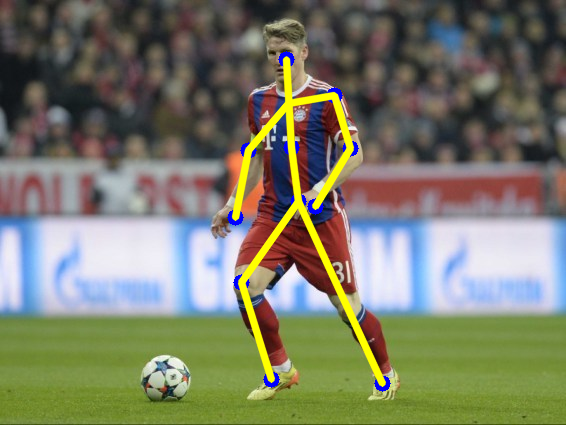

In [0]:
from google.colab.patches import cv2_imshow
# for image testing 
IMAGE='/content/drive/My Drive/school work/pose_test/Pose_images/ah.jpg'

image=cv2.imread(IMAGE,cv2.IMREAD_UNCHANGED)
joint_image=processImage(image, 0)
cv2_imshow(image)